# **PROYECTO DATA SCIENCE (Adel Garcia)**

# **LIMPIAR DATOS DE UN DATASET - TITANIC (NORMALIZAR Y GUARDAR UN DATASET LIMPIO)**

Primero cargamos el DATASET, en este caso como es un archivo trabajado en google-colab sera cargado como url y despues como csv con pandas

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

Ya que tenemos el CSV cargado, vamos viendo que columnas contiene. El tipo de datos, y la cuenta de los mismos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora que ya sabemos cuales son las columnas que tiene el dataset, y saber la cuenta de todos estos datos, podemos empezar a limpiar. Por ejemplo; Normalizar el numero de datos que tiene Age, Cabin y Embarqued, que son los datos que se pasan o les faltan registros.

Comenzaremos viendo, cuantos son los registros que no contienen datos

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Con estas funciones concatenadas podemos buscar cuales son los registros que contienen NULL y despues sumarlas para obtener la cuenta de valores que faltan y ahora si poder empezar a normalizar

Empezaremos con Age, que para hacer más optimo su normalizacion, se va a ocupar la mediana, con Embarked ocuparemos la moda y con Cabin, solo normalizaremos con "No hay cabina"

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("No hay cabina")


Ya que estan normalizados, ahora si podemos ver la info para comprobar que el numero de datos no nos de problema

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ya que estan totalmente normalizados, ahora si podemos hacer un estudío o un analisis exploratorio más a detalle para futuros proyectos más avanzados por ejemplo saber cual es el porcentaje de supervivencia

In [ ]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


Con el codigo anterior hacemos un conteo de valores. Normalize hace la conversion a porcentaje, no el numero literal. Entonces podemos ver que el 61% de personas no sobrevivieron y el 38% si

Ahora guardaremos el csv limpio

In [ ]:
df.to_csv("Titanic_limpio.csv", index=False)

Ahora con los datos limpios, exploremos relaciones. outliers, etc


## **ANALISIS EXPLORATORIO DE DATOS (EDA)**

Importamos nuestro csv limpio

In [ ]:
df = pd.read_csv("Titanic_limpio.csv")

Veremos ahora funciones que nos describan nuestro dataset

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ahora para que nuestro describe incluya los datos que son texto se hace:

In [ ]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Dooley, Mr. Patrick",male,347082,No hay cabina,S
freq,1,577,7,687,646


Empezamos a visualizar

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

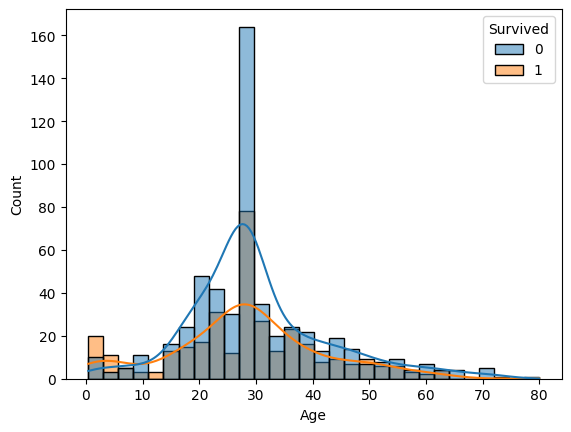

In [ ]:
sns.histplot(df, x= 'Age', hue='Survived',kde=True, color="#124F66")

En el grafico anterior podemos ver que la mayoria de personas se encontraban en el rango de edad de entre los 27 a 30 años

<Axes: xlabel='Sex', ylabel='count'>

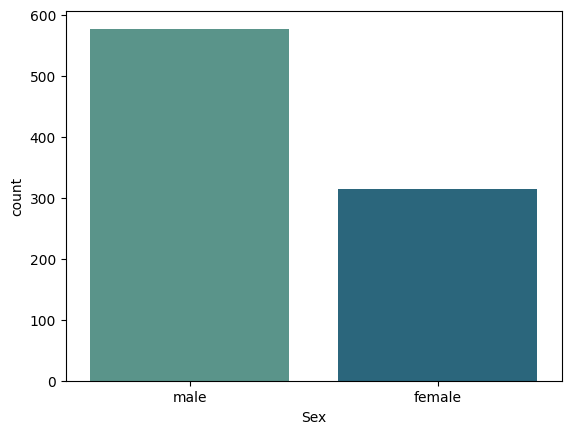

In [ ]:
sns.countplot(x = df['Sex'], hue = df['Sex'], palette="crest")


Ahora veremos la correlacion que hay entre los datos

<Axes: >

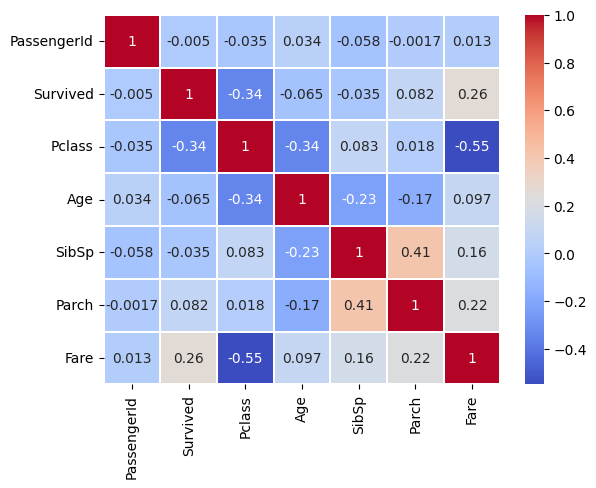

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.3)

Lo que podemos ver es que las mas fuertes son que los de primera clase son quienes mas probabilidades tenian para sobrevivir

Ahora veremos graficamente los datos bivariados

<Axes: xlabel='Survived', ylabel='Age'>

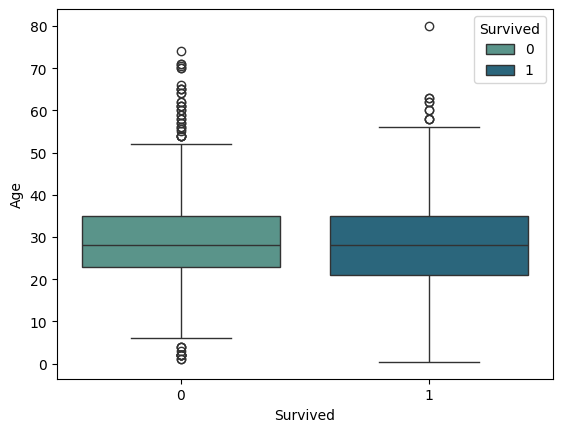

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df, palette='crest', hue='Survived')

Con esto podemos intuir que la gente que sobrevivio tuvo entre 27 y 30 años, al igual que las que no sobrevivieron. Nuestros Outliers fueron la gente de arriba de 55 que no sobrevivieron

<Axes: xlabel='Fare', ylabel='Pclass'>

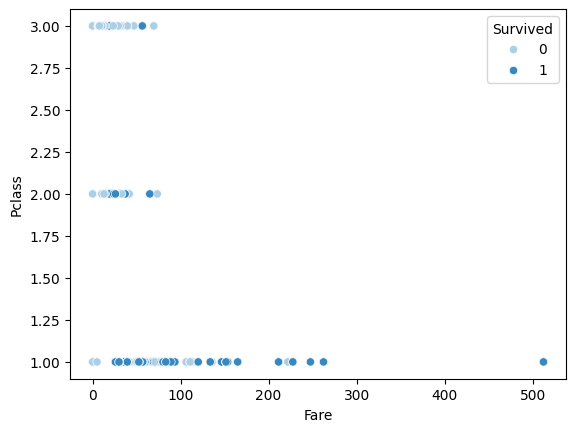

In [ ]:
sns.scatterplot(x='Fare',y='Pclass', data=df, palette='Blues', hue='Survived')

Con esta podemos observar que la gente que tenia primera clase, tuvo más oportunidad de sobrevivir que los que compraron boletos de turista (3ra)

<Axes: xlabel='Sex', ylabel='Survived'>

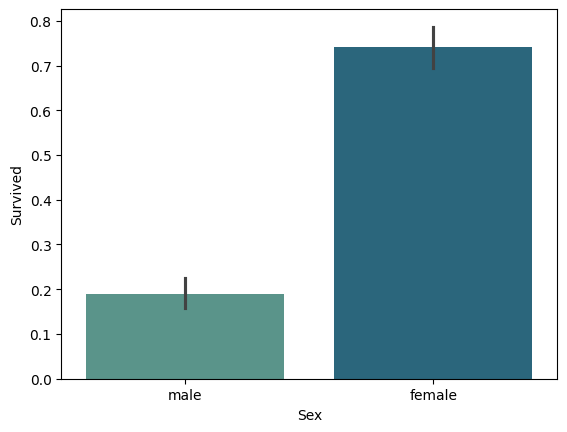

In [ ]:
sns.barplot(x='Sex',y='Survived', data=df, palette="crest", hue='Sex')

Y en esta ultima podemos ver que el 75% de las mujeres y poco menos del 20% de los hombres sobrevivieron

<Axes: ylabel='Fare'>

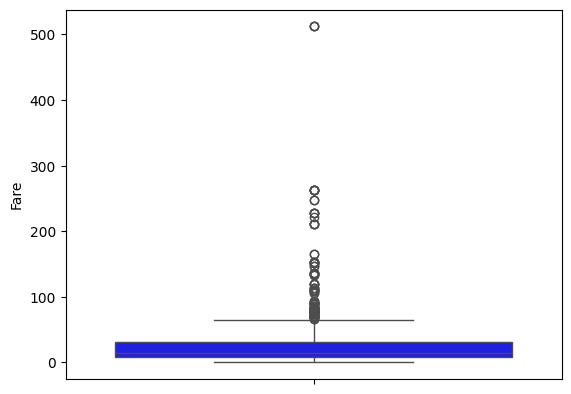

In [ ]:
sns.boxplot(df['Fare'], color='blue')

In [ ]:
df['Fare'].max()

512.3292

El outlier fue que alguien pago más de 512 dolares por su boleto

# **FEATURE ENGINEERING**  

Este es el proceso en el cual se tiene que mejorar y preparar variables para despues procesarlas ya que los modelos de machine learning no adminten texto, solo numero

entonces cambiaremos las categorias de 'Sex' y 'Embarked' para que se vuelvan 0 y 1.

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,No hay cabina,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,No hay cabina,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,No hay cabina,True,False,True


Lo que hace la funcion aplicada, es crear nuevas columnas con valores que acepte un modelo de machine learning. Ya ejecutandolo podemos ver que se agregaron nuevas columnas como Sex_female

Ahora aplicaremos una herramienta de sklearn para que la columna cabin se modifique y cree valores unicos con numeros

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['Cabin'] = enc.fit_transform(df['Cabin'])


Veamos el resultado

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,146,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,81,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,146,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,55,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,146,True,False,True


Podemos ver que los vlores de Cabin ya no son letras, si no, numeros

Ahora crearemos columnas que ayuden que el modelo entienda mejor el dataset

In [ ]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df['Solo'] = (df['Family'] == 1).astype(int)

Vemos el resultado

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Family,Solo
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,146,True,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,81,False,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,146,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,55,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,146,True,False,True,1,1


Ya creadas las columnas. Tenemos los datos convertidos y relacionados

Ahora escalaremos los valores de Age y de Fare a una escala de 0 a 1 con una herramienta de Sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Family,Solo
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,146,True,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,81,False,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,146,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,55,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,146,True,False,True,1,1


Ahora vamos a eliminar columnas innecesarias

In [ ]:
df_sn = df.drop(columns=['PassengerId','Name','Ticket'])

In [ ]:
df_sn.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Family,Solo
0,0,3,-0.565736,1,0,-0.502445,146,True,False,True,2,0
1,1,1,0.663861,1,0,0.786845,81,False,False,False,2,0
2,1,3,-0.258337,0,0,-0.488854,146,False,False,True,1,1
3,1,1,0.433312,1,0,0.420730,55,False,False,True,2,0
4,0,3,0.433312,0,0,-0.486337,146,True,False,True,1,1


Y asi tenemos todas nuestras columnas listas para trabajarlas con modelos de machine learning

Ahora separaremos nuestros datos para empezar a trabajar con predicciones. La mision es predecir quien sobrevive dependiendo de sus caracteristicas en el dataset

Ocuparemos Train_test_split para que el 80% de nuestros datos sea para entrenar y el 20% para probar

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_sn.drop(columns=['Survived'])
y = df_sn['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

Ya con los datos separados, empezaremos a entrenar el modelo. Usando un modelo de regresion logistica que ayuda a saber si sobrevivío o no dependiento de sus caracteristicas

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

En este paso estamos importando el tipo de modelo y le estamos asignando despues los datos. X perteneciendo a las caracteristicas y Y al objetivo

Ahora empezamos con las predicciones usando los datos de prueba


In [ ]:
pred = model.predict(x_test)

Ahora vamos a verificar que tan efectivo es el modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Precisión: ', accuracy_score(y_test, pred))
print("Matriz de confusion:\n", confusion_matrix(y_test,pred))
print('Reporte de clasificacion \n', classification_report(y_test, pred))

Precisión:  0.8044692737430168
Matriz de confusion:
 [[90 15]
 [20 54]]
Reporte de clasificacion 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Ya con estos datos podemos saber por la matriz de confusion como funciono el modelo. Por ejemplo, dice que 90 de las personas que dijo que moririan, murieron y 15 que dijo que moririan, sobrevivieron. En la fila de abajo dice que 20 de las personas que dijo que sobrevivirian, murieron y 54 personas que dijo que sobrevivirian, si sobrevivieron

Ahora evaluaremos la calidad del modelo con una herramienta de scikit llamada CrossValScore

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, x, y, cv= 5)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print('Validacion de datos: ', scores)
print("Promedio: ", scores.mean())

Validacion de datos:  [0.7877095  0.78651685 0.78651685 0.76404494 0.8258427 ]
Promedio:  0.7901261691042623


Ahora haremos una matriz de confusíon para ver de manera visual como funciona nuestro modelo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

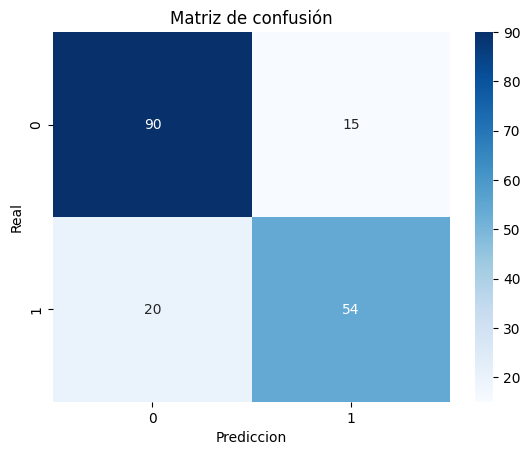

In [ ]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot= True, fmt = 'd', cmap='Blues')
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

# Conclusiones del modelo

1.   El modelo selecionado fue: *LOGISTIC REGRESSION*
2.   Promedío de precision: 79.9%





Ahora pasaremos al ajuste de hiper parametros para mejorar el modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

In [ ]:
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'solver': ['lbfgs', 'liblinear']})

In [ ]:
print("Mejores parámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)

Mejores parámetros: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Mejor score: 0.8019403132079187


Nuestro modelo ha mejorado gracias al GridSearchCV :)

Ahora para terminar, guardaremos el modelo para ser usado a voluntad

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'mimodelotitanic.pkl')

['mimodelotitanic.pkl']

Y asi terminamos este proceso desde el analisis exploratorio hasta machine learning :)

probemos el modelo :)

In [ ]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [ ]:
model = joblib.load('mimodelotitanic.pkl')
nuevodf = pd.DataFrame([{
    'Pclass': 1,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 300,
    'Cabin': 0,
    'Sex_male': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'Family': 1,
    'Solo': 1
}])

prediccion = model.predict(nuevodf)
print("Prediccion: ", prediccion)

Prediccion:  [1]


1 = Sobrevivío
0 = No sobrevivío